<div style="text-align: left;"><img src="https://www.juliabox.org/assets/img/juliacloudlogo.png" style="margin: 0px 0px 0px 0px; padding-right: 20px;width: 80px; float: left;" title="" alt="" /></div>
<img src="http://dmkpress.com/images/cms/thumbs/a5b0aeaa3fa7d6e58d75710c18673bd7ec6d5f6d/978-5-97060-370-3_270_369__100.jpg" style="margin: 0px 0px 5px 20px; width: 100px; float: right;" title="" alt="" />
Всестороннее введение в новый язык программирования для научно-технических вычислений [Julia](http://julialang.org/) в книге Малколма Шеррингтона, Packt Publishing, июль 2015.

<h1>Осваиваем язык Julia</h1><br />

Совершенствование мастерства в области аналитики и программирования при помощи Julia в целях решения задач комплексной обработки данных
<div style="text-align: left;font-size:8pt;padding-top:10px;">Программный код Julia (v0.4.5) протестирован в Windows 8.1/10 и Linux/Lubuntu 16.4</div>
<div style="text-align: left;"><h1>Глава 5. Примеры</h1></div>

# Распределение вероятностей
## Ядерная оценка плотности

In [1]:
#
# kdensity.jl
#

cd(joinpath(homedir(), "julia_projects","data"))

using RDatasets, KernelDensity

mlmf = dataset("mlmRev", "Gcsemv");

df = mlmf[complete_cases(mlmf[[:Written, :Course]]), :]

,School,Student,Gender,Written,Course
1,20920,16,M,23.0,NaN
2,20920,25,F,NaN,71.2
3,20920,27,F,39.0,76.8
4,20920,31,F,36.0,87.9
5,20920,42,M,16.0,44.4
6,20920,62,F,36.0,NaN
7,20920,101,F,49.0,89.8
8,20920,113,M,25.0,17.5
9,20920,146,M,NaN,32.4
10,22520,1,F,48.0,84.2


In [2]:
dc = convert(Array, df[:Course]);
dcc = zeros(0);
for i in 1:length(dc)
  if !isnan(dc[i])
    push!(dcc,dc[i])
  end
end
kdc = kde(dcc)

KernelDensity.UnivariateKDE{FloatRange{Float64}}(-3.983973372759909:0.05726328614827543:113.2339733727599,[6.01058e-7,5.70606e-7,5.429e-7,5.17817e-7,4.95245e-7,4.75081e-7,4.5723e-7,4.41608e-7,4.28136e-7,4.16746e-7  …  1.09113e-6,1.02409e-6,9.61645e-7,9.03548e-7,8.49568e-7,7.99492e-7,7.53119e-7,7.10259e-7,6.70737e-7,6.34388e-7])

In [3]:
dw = convert(Array, df[:Written]);
dww = zeros(0);
for i in 1:length(dw)
  if !isnan(dw[i])
    push!(dww,dw[i])
  end
end
kdw = kde(dww)

KernelDensity.UnivariateKDE{FloatRange{Float64}}(-10.270276825515484:0.05429435938008352:100.87027682551549,[5.75464e-8,5.80719e-8,5.8952e-8,6.01911e-8,6.17954e-8,6.37727e-8,6.61325e-8,6.8886e-8,7.20459e-8,7.56269e-8  …  7.19147e-8,6.87986e-8,6.60783e-8,6.37425e-8,6.17815e-8,6.01873e-8,5.89534e-8,5.80749e-8,5.75484e-8,5.73723e-8])

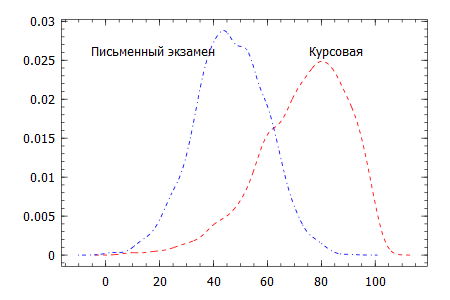

In [7]:
using Winston

kdc = kde(dcc); kdw = kde(dww);

p = Winston.plot(kdc.x, kdc.density, "r--", kdw.x, kdw.density, "b;")
add(p, PlotLabel(.25, .87, "Письменный экзамен", color=0x0))
add(p, PlotLabel(.75, .87, "Курсовая", color=0x0))